In [5]:
print("Start import software module")
import csv
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda, ELU, Activation
from keras.layers.convolutional import Convolution2D
from keras.models import model_from_json
from keras import backend as K
import matplotlib.pyplot as plt
#import pickle
#import random
import pandas as pd
import numpy as np
import tensorflow as tf
#import sklearn
import cv2
from sklearn.model_selection import train_test_split
%matplotlib inline
#from tensorflow.contrib.layers import flatten
print("Finish software module")

Start import software module
Finish software module


In [6]:
#define some functions

def preprocess_image(image):
    n_row,n_col, n_ch = image.shape
    # This removes most of the area above the road and small amount below including the hood
    new_image = image[int(n_row * 0.33):int(n_row * 0.875), :]
    # resize
    new_image = cv2.resize(new_image, (200,66), interpolation=cv2.INTER_AREA)
    return new_image

def read_image(file_name):
    img = cv2.imread(file_name)
    img = preprocess_image(img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

In [7]:
# Load datadata
print("Start data loading")
# need to revise on OSU OSC
features_directory = './training_data/'
labels_file= './training_data/driving_log.csv'
#define the input image shape
row = 66
col = 200
ch = 3 
## split the data into 80% training, 20% validation
n_ep = 0
with open(labels_file, mode='r') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        n_ep = n_ep + 1
n_ep = n_ep - 1        
print('the number of epoch is ', n_ep)    
arr = np.arange(n_ep)
np.random.shuffle(arr)
t = arr[:int(n_ep * 0.8)]
v = arr[int(n_ep * 0.8):]
print("the number of training sample ", len(t))
print("the number of validatoin sample ", len(v))

Start data loading
the number of epoch is  8036
the number of training sample  6428
the number of validatoin sample  1608


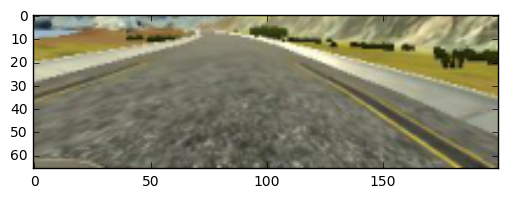

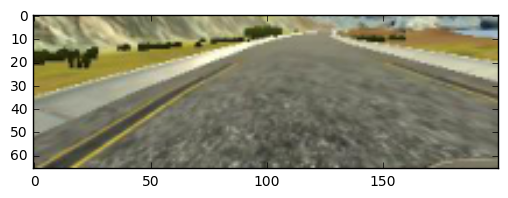

In [12]:
#visuization
image_index = np.random.randint(len(t))
df=pd.read_csv(labels_file, sep=',',header=None)
#center camera
camera_index = 2
features_file = features_directory + df[camera_index][image_index].strip()
img = read_image(features_file)
flip_img = cv2.flip(img,1)
plt.figure(1)
plt.imshow(img)
plt.figure(2)
plt.imshow(flip_img)


